<h1> <center> Ejercicio en Clase 2 </center> </h1>
El siguiente ejercicio en clase busca abordar un problema de clasificación con el uso de las distintas técnicas vistas en clase, para ello presentamos a continuación desde la exploración de la información, balanceo de los datos, y las distintas aproximaciones y comparaciones entre los modelos de clasificación.
Cada sección posee una serie de ejercicios que usted tendrá que solucionar

## Evolución de un modelo de machine learning
* Definición del objetivo
* Exploración de los datos
* Procesamiento de datos
* Estimación de los modelos
* Evaluar la capacidad de predicción de los modelos


## Objetivo
Estimar que pasajetos murieron en el hundimiento del Titanic, dado unas caracterísitas demográficas

## Base de datos
La base de datos del Titanic es una muestra de la tripulación que navego en el barco. Se compone de los siguientes campos:
* **PassengerId:** Identificador del pasajero
* **Survived:** El pasajero sobrevivio o no (0 = No, 1 = Sí)
* **Pclass:** La clase del boleto que compró el pasajero (1 = 1er, 2 = 2do, 3 = 3ro)
* **Name:** Nombre del pasajero
* **Sex:** El sexo del pasajero
* **Age:** Edad del pasajero
* **SibSp:** La cantidad de hermanos o cónyuges que el pasajero tenía a bordo del Titanic
* **Parch:** El número de padres o hijos que el pasajero tenía a bordo del Titanic
* **Ticket:** El número de boleto del pasajero
* **Fare:** La tarifa que pagó el pasajero
* **Cabin:** El número de cabina del pasajero
* **Embarked:** El puerto donde se embarcó el pasajero (C = Cherbourg, Q = Queenstown, S = Southampton)

In [75]:
# Data 
import pandas as pd
import numpy as np
import re

#Visualitation
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
plt.style.use('seaborn-poster')

#Warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# Data manipulation with scikit learning
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler

# Models
import statsmodels.api as sm2
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Metrics and hyperparameters
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score, roc_curve 

### Cargar el dataset

In [76]:
titanic = pd.read_csv("titanic.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [77]:
titanic.shape

(891, 12)

In [78]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Ejercicio 0:
¿Cuáles variables considera relevantes para realizar la estimación de nuestros modelos?

In [79]:
# Escriba aquí su respuesta

## Procesamiento de datos
En el curso hemos visto distintas técnicas de procesamiento de datos, en este caso nos encargaremos de los NA

In [80]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Como se puede observar, ```Cabin``` tiene una alta cantidad de ```NAs``` ante ello, podemos eliminar esta variable del ejercicio, pues dada la descripción es posible que no aporte nada a nuestra estimación

### Ejercicio 1
¿Cuál es el porcentaje de valores ausentes para las variables ```Cabin``` y ```Age```?

In [81]:
# Escriba aquí su respuesta

In [82]:
titanic = titanic.drop(columns='Cabin')
titanic = titanic.dropna()
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Exploración de datos
Si bien no hemos visto visualización en el curso, hagamos una exploración sencilla de la información

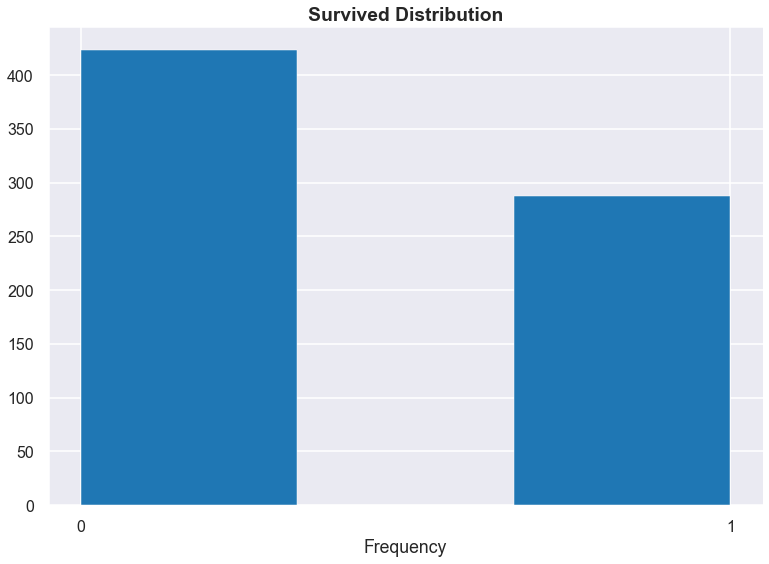

In [83]:
titanic['Survived'].hist(bins=3);
plt.xticks([0,1]);
plt.title("Survived Distribution",fontweight="bold" )
plt.xlabel("Frequency");

### Ejercicio 2
¿Qué información obtiene del gráfico de histogramas de ```Survived```? ¿Cuántas personas que sobrevivieron y cuántas no? ¿Considera que tenemos una base de datos desbalanceada?

In [84]:
# Escriba su respuesta aquí
titanic['Survived'].value_counts()

0    424
1    288
Name: Survived, dtype: int64

In [85]:
1 - 288/(424+288)

0.5955056179775281

## Assessing balance between the control group and the treatment group

Suppose we want to assess whether balance has been achieved for a particular feature $x = age$. We can look at **Standardized Mean Differences (SMD)**, which is calculated by the difference in the means of the ages between the two groups divided by the pooled standard deviation.

$$\mathrm{SMD}(x)=\frac{\bar{x}_{t}-{\bar{x}_{c}}}{\sqrt{\frac{s^{2}_{t} + s^{2}_{c}}{2}}}.$$
 
The following explains the notation in the above equation:

1. $(\bar{x}_{t}$, $\bar{x}_{c}$) denotes the mean of that feature (in our example, the age) for the treatment and control group respectively. Note that people often times report the absolute value of this number.
2. ($s^{2}_{t}$, $s^{2}_{c}$)  denotes the standard deviation of that feature for the treatment and control group respectively. For the denominator we are just pooling standard deviation.
We can calculate the standardized mean differences for every feature. If our calculated SMD is 1, then that means there's a 1 standard deviation difference in means. The benefit of having standard deviation in the denominator is that this number becomes insensitive to the scale of the feature. 

After computing this measurement for all of our features, there is a rule of thumb that is commonly used to determine whether that feature is balanced or not (similar to the idea of using 0.05 as a threshold for $p$ - values):

1. **SMD < 0.1**: For a **randomized trial**, the SMD between all of the covariates should typically fall into this bucket.
2. **SMD is between 0.1 and 0.2**:  Not necessarily balanced, but small enough that people are usually not too worried about them. Sometimes, even after performing matching, there might still be a few covariates whose SMD fall under this range.
3. **SMD > 0.2**: Values that are greater than this threshold are considered seriously imbalanced.

### Algunas modificaciones
Del **Ejercicio 0** es posible encontrar que hay variables que no serán relevantes a la hora de realizar la estimación, pero, de ellas podemos obtener cierta información "escondida"

Por ejemplo de las variables ```SibSp``` y ```Parch``` podemos encontrar si el pasajero viaja solo o no

In [86]:
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1
titanic['IsAlone'] = 0
titanic.loc[titanic['FamilySize'] == 1, 'IsAlone'] = 1

Si bien ```Age``` es flotante, es una variable discreta que podemos convertir a nivel categórico

In [87]:
titanic['Age'].value_counts()

24.00    30
22.00    27
18.00    26
28.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [88]:
titanic['Age'] = titanic['Age'].astype(int)
titanic['CategoricalAge'] = pd.cut(titanic['Age'], 5)
list(titanic['CategoricalAge'].unique())

[Interval(16.0, 32.0, closed='right'),
 Interval(32.0, 48.0, closed='right'),
 Interval(48.0, 64.0, closed='right'),
 Interval(-0.08, 16.0, closed='right'),
 Interval(64.0, 80.0, closed='right')]

Al igual que ```Age```, ```Fare``` también es flotante, la cuál podemos convertir a nivel categórico

In [89]:
titanic['Fare'] = titanic['Fare'].astype(int)
titanic['CategoricalFare'] = pd.cut(titanic['Fare'], 4)
list(titanic['CategoricalFare'].unique())

[Interval(-0.512, 128.0, closed='right'),
 Interval(256.0, 384.0, closed='right'),
 Interval(128.0, 256.0, closed='right'),
 Interval(384.0, 512.0, closed='right')]

De los nombres de los pasajeros, podemos tomar su titulo, por ejemplo si es ```Mister``` o ```Miss```

In [90]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""
titanic['Title'] = titanic['Name'].apply(get_title)
titanic['Title'].value_counts()
titanic['Title'] = titanic['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 
                                             'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
titanic['Title'] = titanic['Title'].replace( 'Mlle', 'Miss')
titanic['Title'] = titanic['Title'].replace('Ms', 'Miss')
titanic['Title'] = titanic['Title'].replace('Mme', 'Mrs')
print(titanic['Title'].value_counts())

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
titanic['Title'] = titanic['Title'].map(title_mapping)
titanic['Title'] = titanic['Title'].fillna(0)

Mr        398
Miss      148
Mrs       108
Master     36
Rare       22
Name: Title, dtype: int64


Algunas modificaciones adicionales

In [91]:
titanic['Sex'] = titanic['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

# Mapping Embarked
titanic['Embarked'] = titanic['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

# Mapping Fare
titanic.loc[ titanic['Fare'] <= 128.0, 'Fare'] 						        = 0
titanic.loc[(titanic['Fare'] > 128.0) & (titanic['Fare'] <= 256.0), 'Fare'] = 1
titanic.loc[(titanic['Fare'] > 256.0) & (titanic['Fare'] <= 384.0), 'Fare']   = 2
titanic.loc[ titanic['Fare'] > 384.0, 'Fare'] 							        = 3
titanic['Fare'] = titanic['Fare'].astype(int)

# Mapping Age
titanic.loc[ titanic['Age'] <= 18, 'Age'] 					       = 0
titanic.loc[(titanic['Age'] > 18) & (titanic['Age'] <= 32), 'Age'] = 1
titanic.loc[(titanic['Age'] > 32) & (titanic['Age'] <= 48), 'Age'] = 2
titanic.loc[(titanic['Age'] > 48) & (titanic['Age'] <= 64), 'Age'] = 3
titanic.loc[ titanic['Age'] > 64, 'Age']                           = 4


Del anterior ejercicio se encontro que cierta información, tal vez no sea relevante de manera directa, pero de ella podemos tomar ciertos datos que nos permitan obtener otro conjunto de variables

In [92]:
titanic = titanic.drop(columns=['PassengerId', 'Name', 'Ticket', 'SibSp','Parch', 'FamilySize','CategoricalAge',
                                'CategoricalFare','FamilySize'])
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,Title
0,0,3,1,1,0,0,0,1
1,1,1,0,2,0,1,0,3
2,1,3,0,1,0,0,1,2
3,1,1,0,2,0,0,0,3
4,0,3,1,2,0,0,1,1


### Distribución de las variables

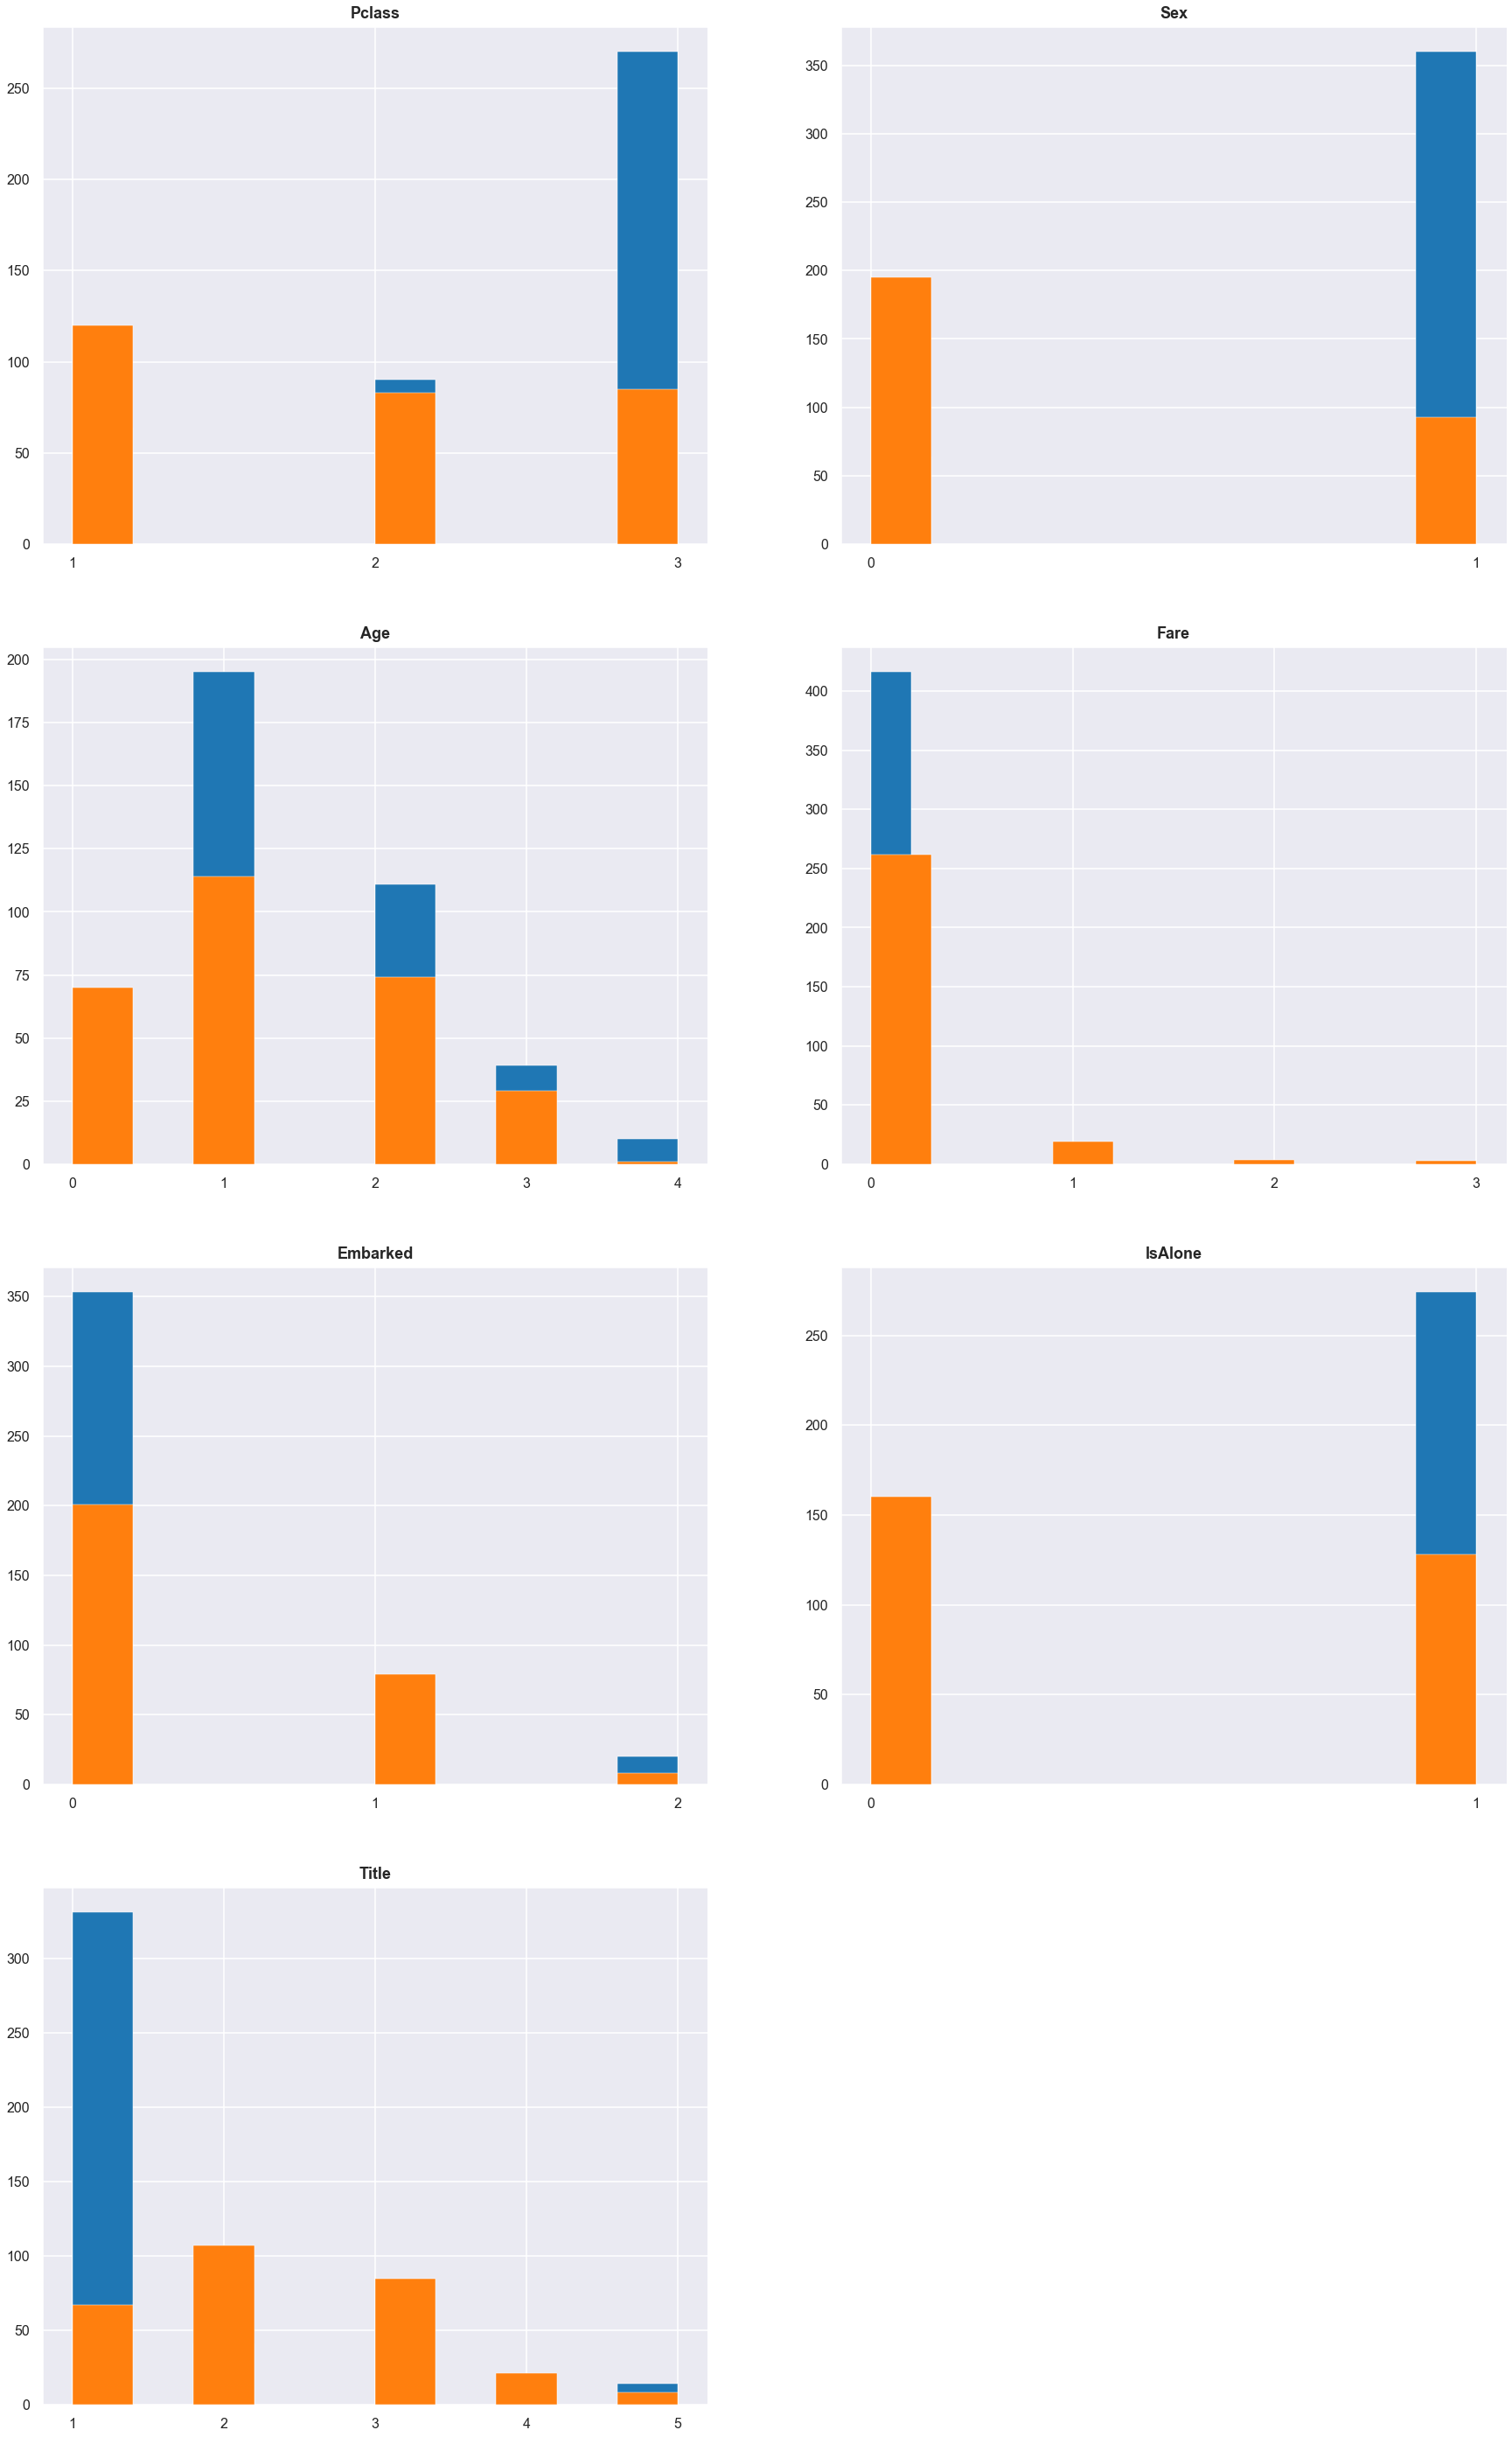

In [93]:
variables = ['Pclass', 'Sex',"Age","Fare",'Embarked',"IsAlone",'Title']

plt.figure(figsize=(30,50))    
for i, features in enumerate(variables):
    plt.subplot(4,2,i+1)
#     titanic[features].hist()
    titanic[features][titanic['Survived'] == 0].hist()
    titanic[features][titanic['Survived'] == 1].hist()
    title = str(variables[i])
    plt.title(title, fontsize=18, verticalalignment='bottom',fontweight="bold");
    plt.xticks(list(titanic[features].unique()));

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,Title
Survived,1.000000,-0.356462,-0.536762,-0.066822,0.155416,0.108517,-0.199741,0.388999
Pclass,-0.356462,1.000000,0.150826,-0.361772,-0.299164,-0.108502,0.150576,-0.167115
Sex,-0.536762,0.150826,1.000000,0.106167,-0.120938,-0.097129,0.284009,-0.469982
Age,-0.066822,-0.361772,0.106167,1.000000,0.051791,0.005254,0.164444,-0.065707
Fare,0.155416,-0.299164,-0.120938,0.051791,1.000000,0.100829,-0.088202,0.032044
Embarked,0.108517,-0.108502,-0.097129,0.005254,0.100829,1.000000,-0.049007,0.084872
IsAlone,-0.199741,0.150576,0.284009,0.164444,-0.088202,-0.049007,1.000000,-0.381615
Title,0.388999,-0.167115,-0.469982,-0.065707,0.032044,0.084872,-0.381615,1.000000


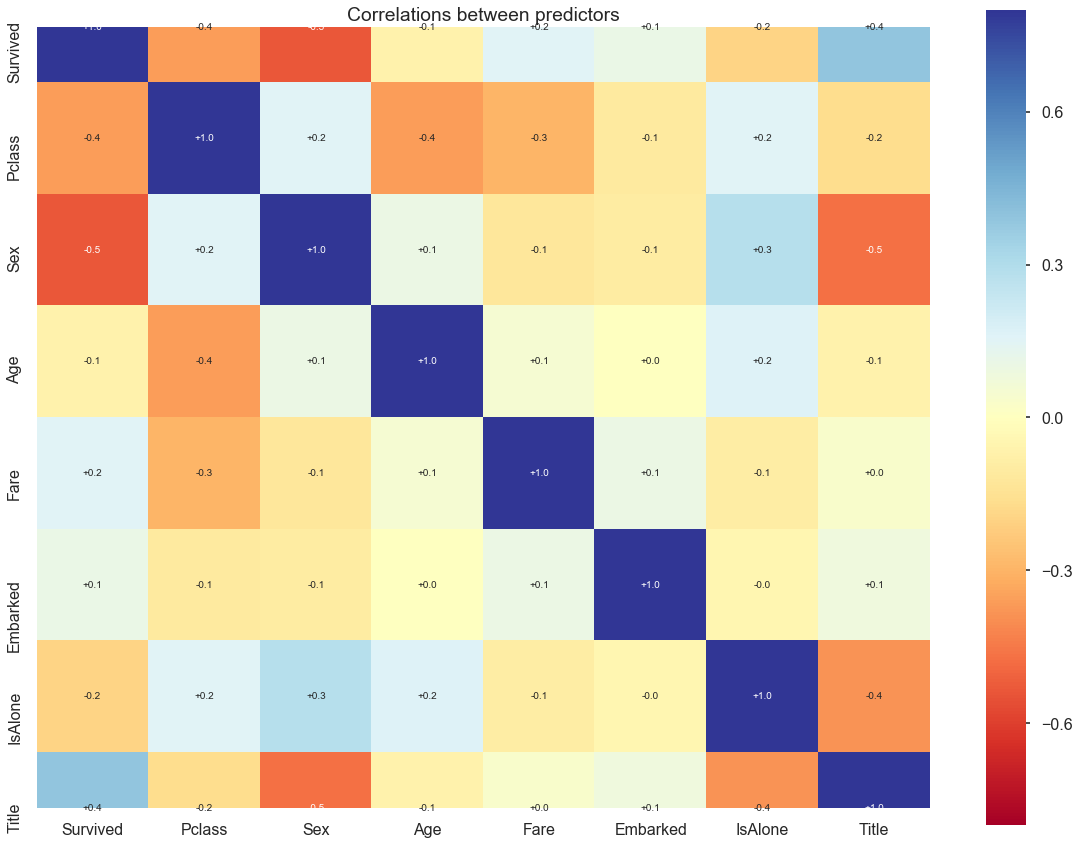

In [94]:
plt.figure(figsize=(20,15))
sns.heatmap(titanic.corr(), cmap="RdYlBu", annot=True, square=True,vmin=-0.8, vmax=0.8, fmt="+.1f")
plt.title("Correlations between predictors")
titanic.corr()

### Estandarización de la información

Como vimos en la sesión pasada, en varios casos es importante realizar la estandarización


In [95]:
# std_scaler = StandardScaler()

# titanic['Pclass'] = std_scaler.fit_transform(titanic['Pclass'].values.reshape(-1,1))
# titanic['Sex'] = std_scaler.fit_transform(titanic['Sex'].values.reshape(-1,1))
# titanic['Age'] = std_scaler.fit_transform(titanic['Age'].values.reshape(-1,1))
# titanic['Fare'] = std_scaler.fit_transform(titanic['Fare'].values.reshape(-1,1))
# titanic['Embarked'] = std_scaler.fit_transform(titanic['Embarked'].values.reshape(-1,1))
# titanic['IsAlone'] = std_scaler.fit_transform(titanic['IsAlone'].values.reshape(-1,1))
# titanic['Title'] = std_scaler.fit_transform(titanic['Title'].values.reshape(-1,1))

In [96]:
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,Title
0,0,3,1,1,0,0,0,1
1,1,1,0,2,0,1,0,3
2,1,3,0,1,0,0,1,2
3,1,1,0,2,0,0,0,3
4,0,3,1,2,0,0,1,1


## Modelación
Ahora para poder predecir si un pasajero sobrevive o no, tenemos en cuenta varios elementos. Primero que nuestra variable target es categorica/binaria, segundo, que existe una variable categórica, por lo que, de las anteriores sesiones observamos distintas técnicas para realizar modelaciones


### Datos de entrenamiento y de validación
De nuestros ejercicios, siempre hemos separado la información, entre entrenamiento y validación/testeo. En este caso, dividiremos nuestra información en 70% de entrenamiento y 30% de testeo.

In [97]:
y = titanic.Survived
X = titanic.drop('Survived', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=27)

### Regresión Logística
Una regresión logistica se basa en la idea de la regresión lineal, salvo que ajusta el resultado en un número entre 0 y 1

In [98]:
logit = LogisticRegression()
logit_model = logit.fit(X_train,y_train)
logit_pred = logit_model.predict(X_test)
logit_roc_auc = roc_auc_score(y_test, logit_pred)

### Naïve Bayes
Este algoritmo simple esta basado en el Teorema de Bayes. Este asume que el efecto de una característica particular en una clase es independiente de otras características

In [99]:
def hyperopt_train_test(params):
    clf = BernoulliNB(**params)
    return cross_val_score(clf, X_train, y_train).mean()
space4knn = {
    'alpha': hp.uniform('alpha', 0.0, 2.0)
}

def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}
trials = Trials()
best = fmin(f, space4knn, algo=tpe.suggest, max_evals=100, trials=trials)
print('best:')
print(best)

100%|██████████| 100/100 [00:01<00:00, 71.20it/s, best loss: -0.785140562248996]
best:
{'alpha': 0.9134301891744461}


In [116]:
NaiveBayes = BernoulliNB(alpha=   0.9134301891744461)
NB_model = NaiveBayes.fit(X_train,y_train)
NB_pred = NB_model.predict(X_test)
NB_roc_auc = roc_auc_score(y_test, NB_pred)

### K Nearest Neighbor
Este es un algoritmo simple con el que se pueden abordar problemas de reconocimiento de patrones, minería de datos/texto, detección de intrusos, entre otros, en el que el conjunto de datos puede ser no paramétrico (No hay suposición explicita sobre la forma funcional de los datos) y este algoritmos esta basado en instancias, es decir, el algoritmo no aprende directamente del modelo, sino de las instancias de información, que son utilizadas como "conocimiento" para poder clasificar los datos nuveos.

In [101]:
def hyperopt_train_test(params):
    clf = KNeighborsClassifier(**params)
    return cross_val_score(clf, X_train, y_train).mean()
space4knn = {
    'n_neighbors': hp.choice('n_neighbors', range(2,10))
}
def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}
trials = Trials()
best = fmin(f, space4knn, algo=tpe.suggest, max_evals=100, trials=trials)
print('best:')
print(best)

100%|██████████| 100/100 [00:02<00:00, 34.38it/s, best loss: -0.7791164658634537]
best:
{'n_neighbors': 6}


In [115]:
KNN = KNeighborsClassifier(n_neighbors=6)
KNN_model = KNN.fit(X_train,y_train)
KNN_pred = KNN_model.predict(X_test)
KNN_roc_auc = roc_auc_score(y_test, KNN_pred)

### Decision Tree
Es una técnica de machine learning no supervisado en la cual, por medio de una representación esquemática de las variables facilita la toma de mejores decisiones puesto qeu me permite realizar predicciones sobre algún fenómeno. Estos son similares a diagramas de flujo.

In [103]:
def hyperopt_train_test(params):
    clf = DecisionTreeClassifier(**params)
    return cross_val_score(clf, X_train, y_train).mean()
space4dt = {
    'max_depth': hp.choice('max_depth', range(1,20)),
    'max_features': hp.choice('max_features', range(1,5)),
    'criterion': hp.choice('criterion', ["gini", "entropy"])
}
def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, space4dt, algo=tpe.suggest, max_evals=100, trials=trials)
print('best:')
print(best)

100%|██████████| 100/100 [00:01<00:00, 66.46it/s, best loss: -0.7991967871485942]
best:
{'criterion': 1, 'max_depth': 3, 'max_features': 2}


In [114]:
DT = DecisionTreeClassifier(criterion = "entropy", max_depth = 3, max_features = 2)
DT.fit(X_train,y_train)
DT_pred = DT.predict(X_test)
DT_roc_auc = roc_auc_score(y_test, DT_pred)

### Random Forest
Son arboles de decisión construidos en paralelo, los cuales basan su estimación en una submuestra aleatoria del conjunto de información, y al igual que el arbol de decisión este método esta delimitado por los hiperparametros de profundidad, caracteristicas por nodo, estimadores máximos utilizados por cada arbol y el criterio de selección

In [105]:
def hyperopt_train_test(params):
    clf = RandomForestClassifier(**params)
    return cross_val_score(clf, X_train, y_train).mean()
space4rf = {
    'max_depth': hp.choice('max_depth', range(1,20)),
    'max_features': hp.choice('max_features', range(1,5)),
    'n_estimators': hp.choice('n_estimators', range(1,20)),
    'criterion': hp.choice('criterion', ["gini", "entropy"])
}
best = 0
def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}
trials = Trials()
best = fmin(f, space4rf, algo=tpe.suggest, max_evals=100, trials=trials)
print('best:')
print(best)

100%|██████████| 100/100 [00:06<00:00, 16.65it/s, best loss: -0.7991967871485944]
best:
{'criterion': 0, 'max_depth': 3, 'max_features': 0, 'n_estimators': 17}


In [113]:
RF = RandomForestClassifier(criterion="gini", max_depth=2, 
                            n_estimators=17)
RF.fit(X_train,y_train)
RF_pred = RF.predict(X_test)
RF_roc_auc = roc_auc_score(y_test, RF_pred)

### Gradient Boosting
Es una técnica secuencial para la construcción de arboles de decisión, en la que en cada rama buscara el subarbol que mayor ```exactitud```arroje

In [107]:
def hyperopt_train_test(params):
    clf = GradientBoostingClassifier(**params)
    return cross_val_score(clf, X_train, y_train).mean()
space4rf = {
    'max_depth': hp.choice('max_depth', range(1,20)),
    'max_features': hp.choice('max_features', range(1,5)),
    'n_estimators': hp.choice('n_estimators', range(1,20)),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(1))}
best = 0
def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}
trials = Trials()
best = fmin(f, space4rf, algo=tpe.suggest, max_evals=100, trials=trials)
print('best:')
print(best)

100%|██████████| 100/100 [00:06<00:00, 14.53it/s, best loss: -0.8072289156626505]
best:
{'learning_rate': 0.7003856026292848, 'max_depth': 1, 'max_features': 0, 'n_estimators': 8}


In [112]:
GB = GradientBoostingClassifier(learning_rate=  0.7003856026292848,max_depth=1,n_estimators=8)
GB.fit(X_train, y_train)
GB_pred = GB.predict(X_test)
GB_roc_auc = roc_auc_score(y_test, GB_pred)

## Comparación entre los distintos modelos
En este caso seleccionamos el criterio de la curva de ROC para seleccionar cual es el mejor modelo.
El área bajo la curva (AUC) y la curva ROC son métricas de evaluación para verificar el rendimiento de un modelo de clasificación
La curva ROC nos dice que tan bueno puede distiguir un modelo entre 2 clases distintas Mientras que AUC, mide la probabilidad de que el modelo clasifique un ejemplo positivo aleatorio más alto que un ejemplo negativo aleatorio.

### AUC

In [117]:
print('Regresión Logit: ',logit_roc_auc)
print('Naïve Bayes: ',NB_roc_auc)
print('K Near Neighbor: ',KNN_roc_auc)
print('Árbol de decisión: ',DT_roc_auc)
print('Random Forest: ',RF_roc_auc)
print('Gradient Boosting: ',GB_roc_auc)

Regresión Logit:  0.775138021540411
Naïve Bayes:  0.7403384921712372
K Near Neighbor:  0.7900262467191601
Árbol de decisión:  0.7766313693546927
Random Forest:  0.7790750294144266
Gradient Boosting:  0.7784414879174586


In [118]:
print('Regresión Logit: ',logit_model.score(X_train,y_train))
print('Naïve Bayes: ',NB_model.score(X_train,y_train))
print('K Near Neighbor: ',KNN_model.score(X_train,y_train))
print('Árbol de decisión: ',DT.score(X_train,y_train))
print('Random Forest: ',RF.score(X_train,y_train))
print('Gradient Boosting: ',GB.score(X_train,y_train))

Regresión Logit:  0.7931726907630522
Naïve Bayes:  0.7831325301204819
K Near Neighbor:  0.8112449799196787
Árbol de decisión:  0.7971887550200804
Random Forest:  0.8032128514056225
Gradient Boosting:  0.7951807228915663


### Curva ROC

In [119]:
logit_fpr, logit_tpr, thresholds = roc_curve(y_test, logit.predict_log_proba(X_test)[:,1])
NB_fpr, NB_tpr, thresholds = roc_curve(y_test, NB_model.predict_proba(X_test)[:, 1])
KNN_fpr, KNN_tpr, thresholds = roc_curve(y_test, KNN_model.predict_proba(X_test)[:, 1])
DT_fpr, DT_tpr, thresholds = roc_curve(y_test, DT.predict_proba(X_test)[:, 1])
RF_fpr, RF_tpr, thresholds = roc_curve(y_test, RF.predict_proba(X_test)[:, 1])
GB_fpr, GB_tpr, thresholds = roc_curve(y_test, GB.predict_proba(X_test)[:, 1])

''

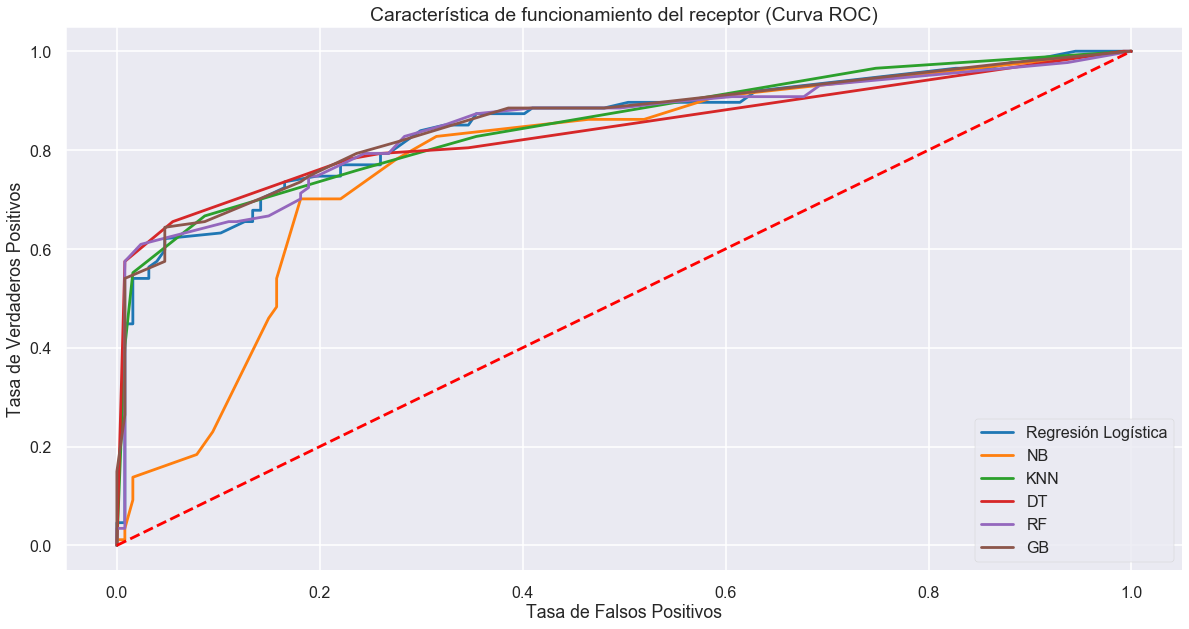

In [120]:
plt.figure(figsize=(20,10))
plt.plot(logit_fpr, logit_tpr, label='Regresión Logística')
plt.plot(NB_fpr, NB_tpr, label='NB')
plt.plot(KNN_fpr, KNN_tpr, label='KNN')
plt.plot(DT_fpr, DT_tpr, label='DT')
plt.plot(RF_fpr, RF_tpr, label='RF')
plt.plot(GB_fpr, GB_tpr, label='GB')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Característica de funcionamiento del receptor (Curva ROC)')
plt.legend(loc="lower right")
;

### Ejercicio 3:
1. Evalue las distintas métricas en cada modelo
2. Realice el mismo ejercicio con al menos alguna de las técnicas de balanceo de datos ¿Cuál es el mejor modelo para predecir si un pasajero sobrevive o no?

In [ ]:
# Escriba aquí su respuesta